# Assignment 1 - Files and Images
Goals: 
1. Learn how to list, load and iterate over files and directories in any filesystem
2. Understand how images are represented in python and perform basic image manipulations

In [5]:
# load required libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

This exercise is meant to help you play around with images and files, if you haven't started already. If this is feeling too basic, you can just skip ahead to the next part.

We'll use the OpenCV library here (`cv2`), but there're other popular image processing libraries out there (e.g., PILLOW or skimage).

Other libraries we'll be using are `os` to interact with files in our computer and `matplotlib` for visualization.

In [7]:
# We want to list all of the files in a directory, so we use the function os.listdir() to get a list of all the files in the directory.
image_dir = './randalls_fish'
files = os.listdir(image_dir)
print(files)
# We can see that this list includes both images and .csv files. We only want to work with the images, so we need to filter out the .csv files.
image_files = [f for f in files if f.endswith('.jpg')] # this syntax is called a list comprehension, it's a way to filter a list on the fly
print(image_files)
print(len(files),len(image_files))

['female_Genicanthus watanabei_Gewat_f1.csv', 'Cephalopholis aurantia_Ceaur_u3.jpg', 'Epinephelus ongus_Epong_u2.csv', 'female_Halichoeres claudia_Haorn_u2.jpg', 'Gymnothorax margaritophorus_Gymar_u4.csv', 'Oxycheilinus bimaculatus_Oxbim_u7.jpg', 'Cirrhilabrus punctatus_Cipun_u4.jpg', 'juvenile_Amphiprion chrysopterus_Amchr_j0.jpg', 'Oxycheilinus digramma_Oxdig_u4.csv', 'female_Halichoeres hartzfeldii_Hahar_f1.jpg', 'juvenile_Amphiprion chrysopterus_Amchr_j0.csv', 'Cirrhilabrus punctatus_Cipun_u4.csv', 'Oxycheilinus bimaculatus_Oxbim_u7.csv', 'Gymnothorax margaritophorus_Gymar_u4.jpg', 'female_Halichoeres hartzfeldii_Hahar_f1.csv', 'Oxycheilinus digramma_Oxdig_u4.jpg', 'Cephalopholis aurantia_Ceaur_u3.csv', 'female_Genicanthus watanabei_Gewat_f1.jpg', 'female_Halichoeres claudia_Haorn_u2.csv', 'Epinephelus ongus_Epong_u2.jpg']
['Cephalopholis aurantia_Ceaur_u3.jpg', 'female_Halichoeres claudia_Haorn_u2.jpg', 'Oxycheilinus bimaculatus_Oxbim_u7.jpg', 'Cirrhilabrus punctatus_Cipun_u4.jpg'

In [8]:
# Now that we have a list of image files, we can load them using OpenCV. We'll load the first image in the list to start.
img = cv2.imread(image_files[0]) # load the image file
print(img.shape) # print the image dimensions

[ WARN:0@18.155] global loadsave.cpp:244 findDecoder imread_('Cephalopholis aurantia_Ceaur_u3.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

In [11]:
# What happens when you run the code chuck above?
# Two things, first, OpenCV did not find the image file so it displayed a warning message and returned None. Second, our code crashed because a None object does not have a shape attribute.
# To understand the first issue, we need to know that the code will look for the file in the current working directory, which is generally the directory where the script is located.
# In our case, the image files are in a subdirectory called randalls_fish, so OpenCV did not find the file.
# To solve this we need to provide the full path to the image file. We can do this by joining the directory name with the file name using the function os.path.join().

img = cv2.imread(os.path.join(image_dir, image_files[0])) # load the image file
print(img.shape) # print the image dimensions (height, width, color channels)

#  Side note: Windows file system uses backslashes to separate directories, which are tricky with python, while linux and macOS use forward slashes. 
# To make the code work on all systems, we use os.path.join() to join the directory and file names

(348, 640, 3)


Your turn: 
Use list comprehension to generate a list of full paths to the image files, fill the code in the chunk below.

In [12]:
### 
image_files = [] # your code here

In [12]:
# We can see our image is a 3D array, with the first two dimensions representing the height and width of the image, and the third dimension representing the color channels - Red Green and Blue (RGB).
print(img[:,:,0])
# each color channel is a 2D array, representing the intensity of that color at each pixel in the image.
print('Array shape is', img[:,:,0].shape)


[[5 5 5 ... 6 6 6]
 [5 5 5 ... 6 6 6]
 [5 5 5 ... 6 6 6]
 ...
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]]
Array shape is (348, 640)


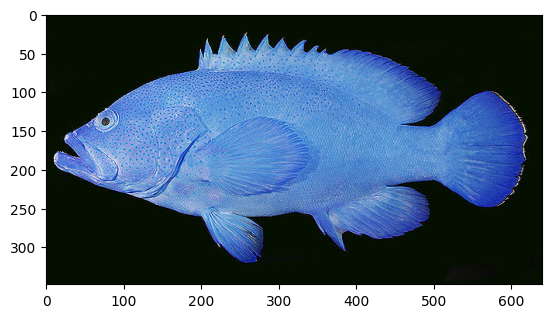

In [13]:
# if we want to see the image, we can use the matplotlib library
# let's take a look at the image we loaded
plt.imshow(img)


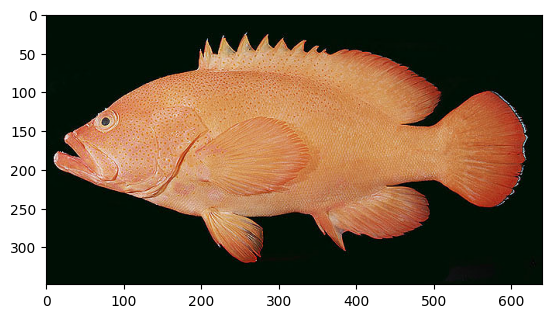

In [21]:
# this fish looks odd, if you look at the image in your file browser you'll see this grouper is actually red
# this is because OpenCV reads images in BGR format, while most other image viewers use RGB format
# we can convert the image to RGB format using the cv2.cvtColor() function OR we just change the channel order ourselves
img_rgb = img[:,:,::-1] # reverse the channel order
plt.imshow(img_rgb)
# Another way using the cv2.cvtColor() function:
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

Now let's try some basic image manipulations (which we call image transformations) using OpenCV, we'll encounter these down the line, particularly in the Augmentations lecture.

(224, 224, 3)


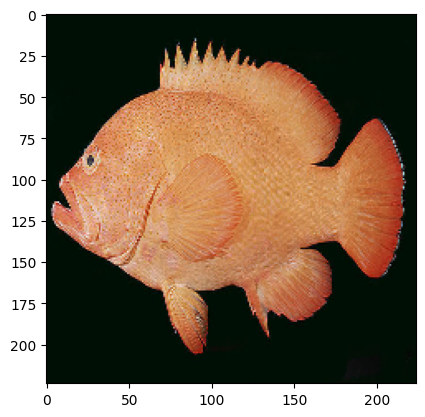

In [18]:
# Resizing, this is a common operation done before feeding images to a Deep Learning model
resized_img = cv2.resize(img_rgb, (224, 224)) # resize the image to 256x256 pixels
plt.imshow(resized_img)
print(resized_img.shape)
# The image is now 224x224 pixels, but the image looks odd since we didn't preserve the aspect ratio.

(224, 224, 3)


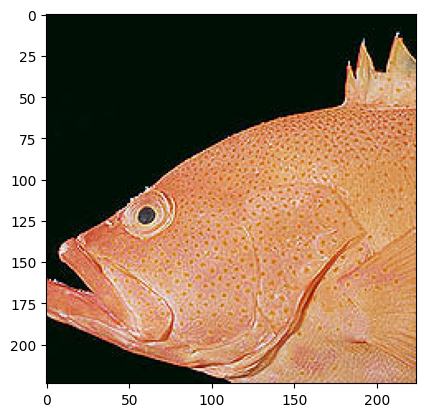

In [22]:
# Cropping
cropped_img = img_rgb[16:240, 16:240,:] # crop the image to 224x224 pixels
plt.imshow(cropped_img)
print(cropped_img.shape)

 

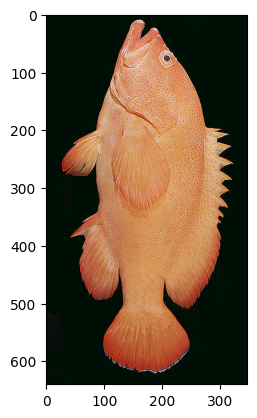

In [40]:
# Rotating
rotated_img = cv2.rotate(img_rgb, cv2.ROTATE_90_CLOCKWISE) # rotate the image 90 degrees clockwise
plt.imshow(rotated_img)

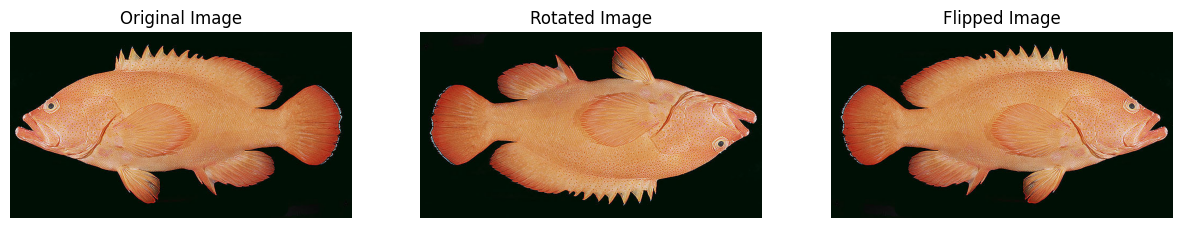

In [39]:
# Rotating vs. flipping
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.subplot(1, 3, 2)
rotated_img = cv2.rotate(img_rgb, cv2.ROTATE_180)
plt.imshow(rotated_img)
plt.title('Rotated Image')
plt.subplot(1, 3, 3)
flipped_img = cv2.flip(img_rgb, 1) # flip the image horizontally
plt.imshow(flipped_img)
plt.title('Flipped Image')
# get rid of the numbered axes:
for i in range(3):
    fig.axes[i].axis('off')


Implement the following transformations on your own:
1. Turn the image to grayscale
2. Change the brightness of the image
3. Blur the image

We use these transformations to enrich our dataset and remedy potential biases in the data (for example prevent the model from learning only left facing creatures are fish). But not all transformations are appropriate for all data applications. Can you think which transformations are appropriate and which are in-appropriate for your data?


### Data source
The images used here are part of a really awesome collection gathered by the legendary Ichtyologist [John E. Randall](https://jerlegacy.com/) and maintained in the [Bishop Museum in Hawaii](http://pbs.bishopmuseum.org/images/JER/) and the [FishBase database](https://www.fishbase.se/photos/PhotosList.php?id=50&vCollaborator=John+E.+Randall). 

### Bonus
Write a function that loops over a list of images and randomly selects a transformation to apply to the image, save the result in a new folder called 'transformed_images'.
